# DSCI 100 Final Project Proposal
- Group 100: Heidi, Tasneem, Gina, and Emily
- Dataset: Wine Quality Dataset found on UCI

## Introduction
- Wine, an alcoholic drink typically made from fermented grapes.

## Dataset
Wine Quality Dataset
- Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
- 12 variables in total
- Length: 4898
- 2 sub datasets, one for red wine and one for white

12 numerical variables
1. Fixed Acidity
2. Volatile Acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality (score between 0 and 10)

## Research Question
- Will we be able to catagorize a wine's quality using the classification model we built?

### Tidy Data

In [1]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 7)
install.packages("GGally")
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
winequalityRed <- read_csv2("data/winequality-red.csv")
winequalityRed
winequalityWhite <- read_csv2("data/winequality-white.csv")
winequalityWhite

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6


In [3]:
winequalityWhite <- mutate(winequalityWhite, type = "white")
# winequalityWhite

In [4]:
winequalityRed <- mutate(winequalityRed, type = "red")
# winequalityRed

In [5]:
winequalityWhite <- mutate(winequalityWhite, quality = as.factor(quality))
winequalityWhite

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,white
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6,white
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6,white


In [6]:
winequalityRed <- mutate(winequalityRed, quality = as.factor(quality))
winequalityRed

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6,red
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5,red
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6,red


In [7]:
completedt <- rbind(winequalityRed, winequalityWhite) |>
              setNames(c("fixed_acidity",
                         "volatile_acidity",
                         "citric_acid",
                         "residual_sugar",
                         "chlorides",
                         "free_SO2",
                         "total_SO2",
                         "density",
                         "pH",
                         "sulphates",
                         "alcohol",
                         "quality",
                         "type"))
completedt$volatile_acidity <- as.numeric(completedt$volatile_acidity)
completedt$citric_acid <- as.numeric(completedt$citric_acid)
completedt$residual_sugar <- as.numeric(completedt$residual_sugar)
completedt$chlorides <- as.numeric(completedt$chlorides)
completedt$density <- as.numeric(completedt$density)
completedt$sulphates <- as.numeric(completedt$sulphates)
completedt

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.020,22,98,0.98941,326,0.32,118,6,white


## Exploratory Data Analysis

### Training Data
The following information include
- Training Set
- Total Number of Rows
- Number of Missing Data
- Counts for Each Wine Quality type
- Mean values for each factors for each quality level of the 2 types of wine

In [8]:
wine_split <- initial_split(completedt, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)
wine_training

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5,red
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,0.21,0.28,5.7,0.028,45,121,0.99168,321,1.08,1215,7,white
62,0.41,0.22,1.9,0.023,5,56,0.98928,304,0.79,13,7,white
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,white


### Total Number of Rows & Missing Data

In [9]:
number_of_rows <- nrow(wine_training)
row_result <- "Total Number of Rows: "
miss_data_result <- "Number of missing data: "
row_result
number_of_rows
miss_data_result
sum(is.na(wine_training))

[1] "Total Number of Rows: "

[1] 4871

[1] "Number of missing data: "

[1] 1

### Counts for Each Wine Quality

In [10]:
counts_quality <- wine_training |>
                  group_by(quality) |>
                  summarize(n = n())
print(as_tibble(counts_quality),n=nrow(counts_quality))

# A tibble: 7 × 2
  quality     n
  <fct>   <int>
1 3          22
2 4         166
3 5        1606
4 6        2124
5 7         809
6 8         141
7 9           3


### Mean Variable values for each Quality level of Wine

In [11]:
# separate the training data into red and white
red_wine_train <- wine_training |>
                  filter(type == "red")

white_wine_train <- wine_training |>
                    filter(type == "white")
                  

red_wine_means <- red_wine_train |>
                  group_by(quality) |>
                  summarize(mean_fix_acidity = mean(fixed_acidity, na.rm = TRUE),
                  mean_v_acidity = mean(volatile_acidity, na.rm = TRUE),
                  mean_citric_acid = mean(fixed_acidity, na.rm = TRUE),
                  mean_res_sugar = mean(fixed_acidity, na.rm = TRUE),
                  mean_chlorides = mean(fixed_acidity, na.rm = TRUE),
                  mean_free_SO2 = mean(fixed_acidity, na.rm = TRUE),
                  mean_total_SO2 = mean(fixed_acidity, na.rm = TRUE),
                  mean_density = mean(fixed_acidity, na.rm = TRUE),
                  mean_pH = mean(fixed_acidity, na.rm = TRUE),
                  mean_sulphates = mean(fixed_acidity, na.rm = TRUE),
                  mean_alcohol = mean(alcohol, na.rm = TRUE))

white_wine_means <- white_wine_train |>
                    group_by(quality) |>
                    summarize(mean_fix_acidity = mean(fixed_acidity, na.rm = TRUE),
                    mean_v_acidity = mean(volatile_acidity, na.rm = TRUE),
                    mean_citric_acid = mean(fixed_acidity, na.rm = TRUE),
                    mean_res_sugar = mean(fixed_acidity, na.rm = TRUE),
                    mean_chlorides = mean(fixed_acidity, na.rm = TRUE),
                    mean_free_SO2 = mean(fixed_acidity, na.rm = TRUE),
                    mean_total_SO2 = mean(fixed_acidity, na.rm = TRUE),
                    mean_density = mean(fixed_acidity, na.rm = TRUE),
                    mean_pH = mean(fixed_acidity, na.rm = TRUE),
                    mean_sulphates = mean(fixed_acidity, na.rm = TRUE),
                    mean_alcohol = mean(alcohol, na.rm = TRUE))

red_wine_means
white_wine_means

quality,mean_fix_acidity,mean_v_acidity,mean_citric_acid,mean_res_sugar,mean_chlorides,mean_free_SO2,mean_total_SO2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,77.00000,0.9600000,77.00000,77.00000,77.00000,77.00000,77.00000,77.00000,77.00000,77.00000,2.508333e+02
4,75.52500,0.6985000,75.52500,75.52500,75.52500,75.52500,75.52500,75.52500,75.52500,75.52500,1.016250e+02
5,73.17934,0.5770858,73.17934,73.17934,73.17934,73.17934,73.17934,73.17934,73.17934,73.17934,9.463938e+01
6,73.96502,0.5012037,73.96502,73.96502,73.96502,73.96502,73.96502,73.96502,73.96502,73.96502,4.096022e+12
7,82.36667,0.4058667,82.36667,82.36667,82.36667,82.36667,82.36667,82.36667,82.36667,82.36667,9.044444e+11
8,77.76923,0.4607692,77.76923,77.76923,77.76923,77.76923,77.76923,77.76923,77.76923,77.76923,8.984615e+01


quality,mean_fix_acidity,mean_v_acidity,mean_citric_acid,mean_res_sugar,mean_chlorides,mean_free_SO2,mean_total_SO2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,77.81250,0.3465625,77.81250,77.81250,77.81250,77.81250,77.81250,77.81250,77.81250,77.81250,8.512500e+01
4,61.90476,0.3851984,61.90476,61.90476,61.90476,61.90476,61.90476,61.90476,61.90476,61.90476,8.917460e+01
5,64.18481,0.3034950,64.18481,64.18481,64.18481,64.18481,64.18481,64.18481,64.18481,64.18481,2.069838e+12
6,61.51343,0.2620208,61.51343,61.51343,61.51343,61.51343,61.51343,61.51343,61.51343,61.51343,1.803215e+12
7,60.77238,0.2652200,60.77238,60.77238,60.77238,60.77238,60.77238,60.77238,60.77238,60.77238,1.036216e+12
8,58.03125,0.2810156,58.03125,58.03125,58.03125,58.03125,58.03125,58.03125,58.03125,58.03125,1.038203e+02
9,78.66667,0.2566667,78.66667,78.66667,78.66667,78.66667,78.66667,78.66667,78.66667,78.66667,1.193333e+02


#### Red Wine Means

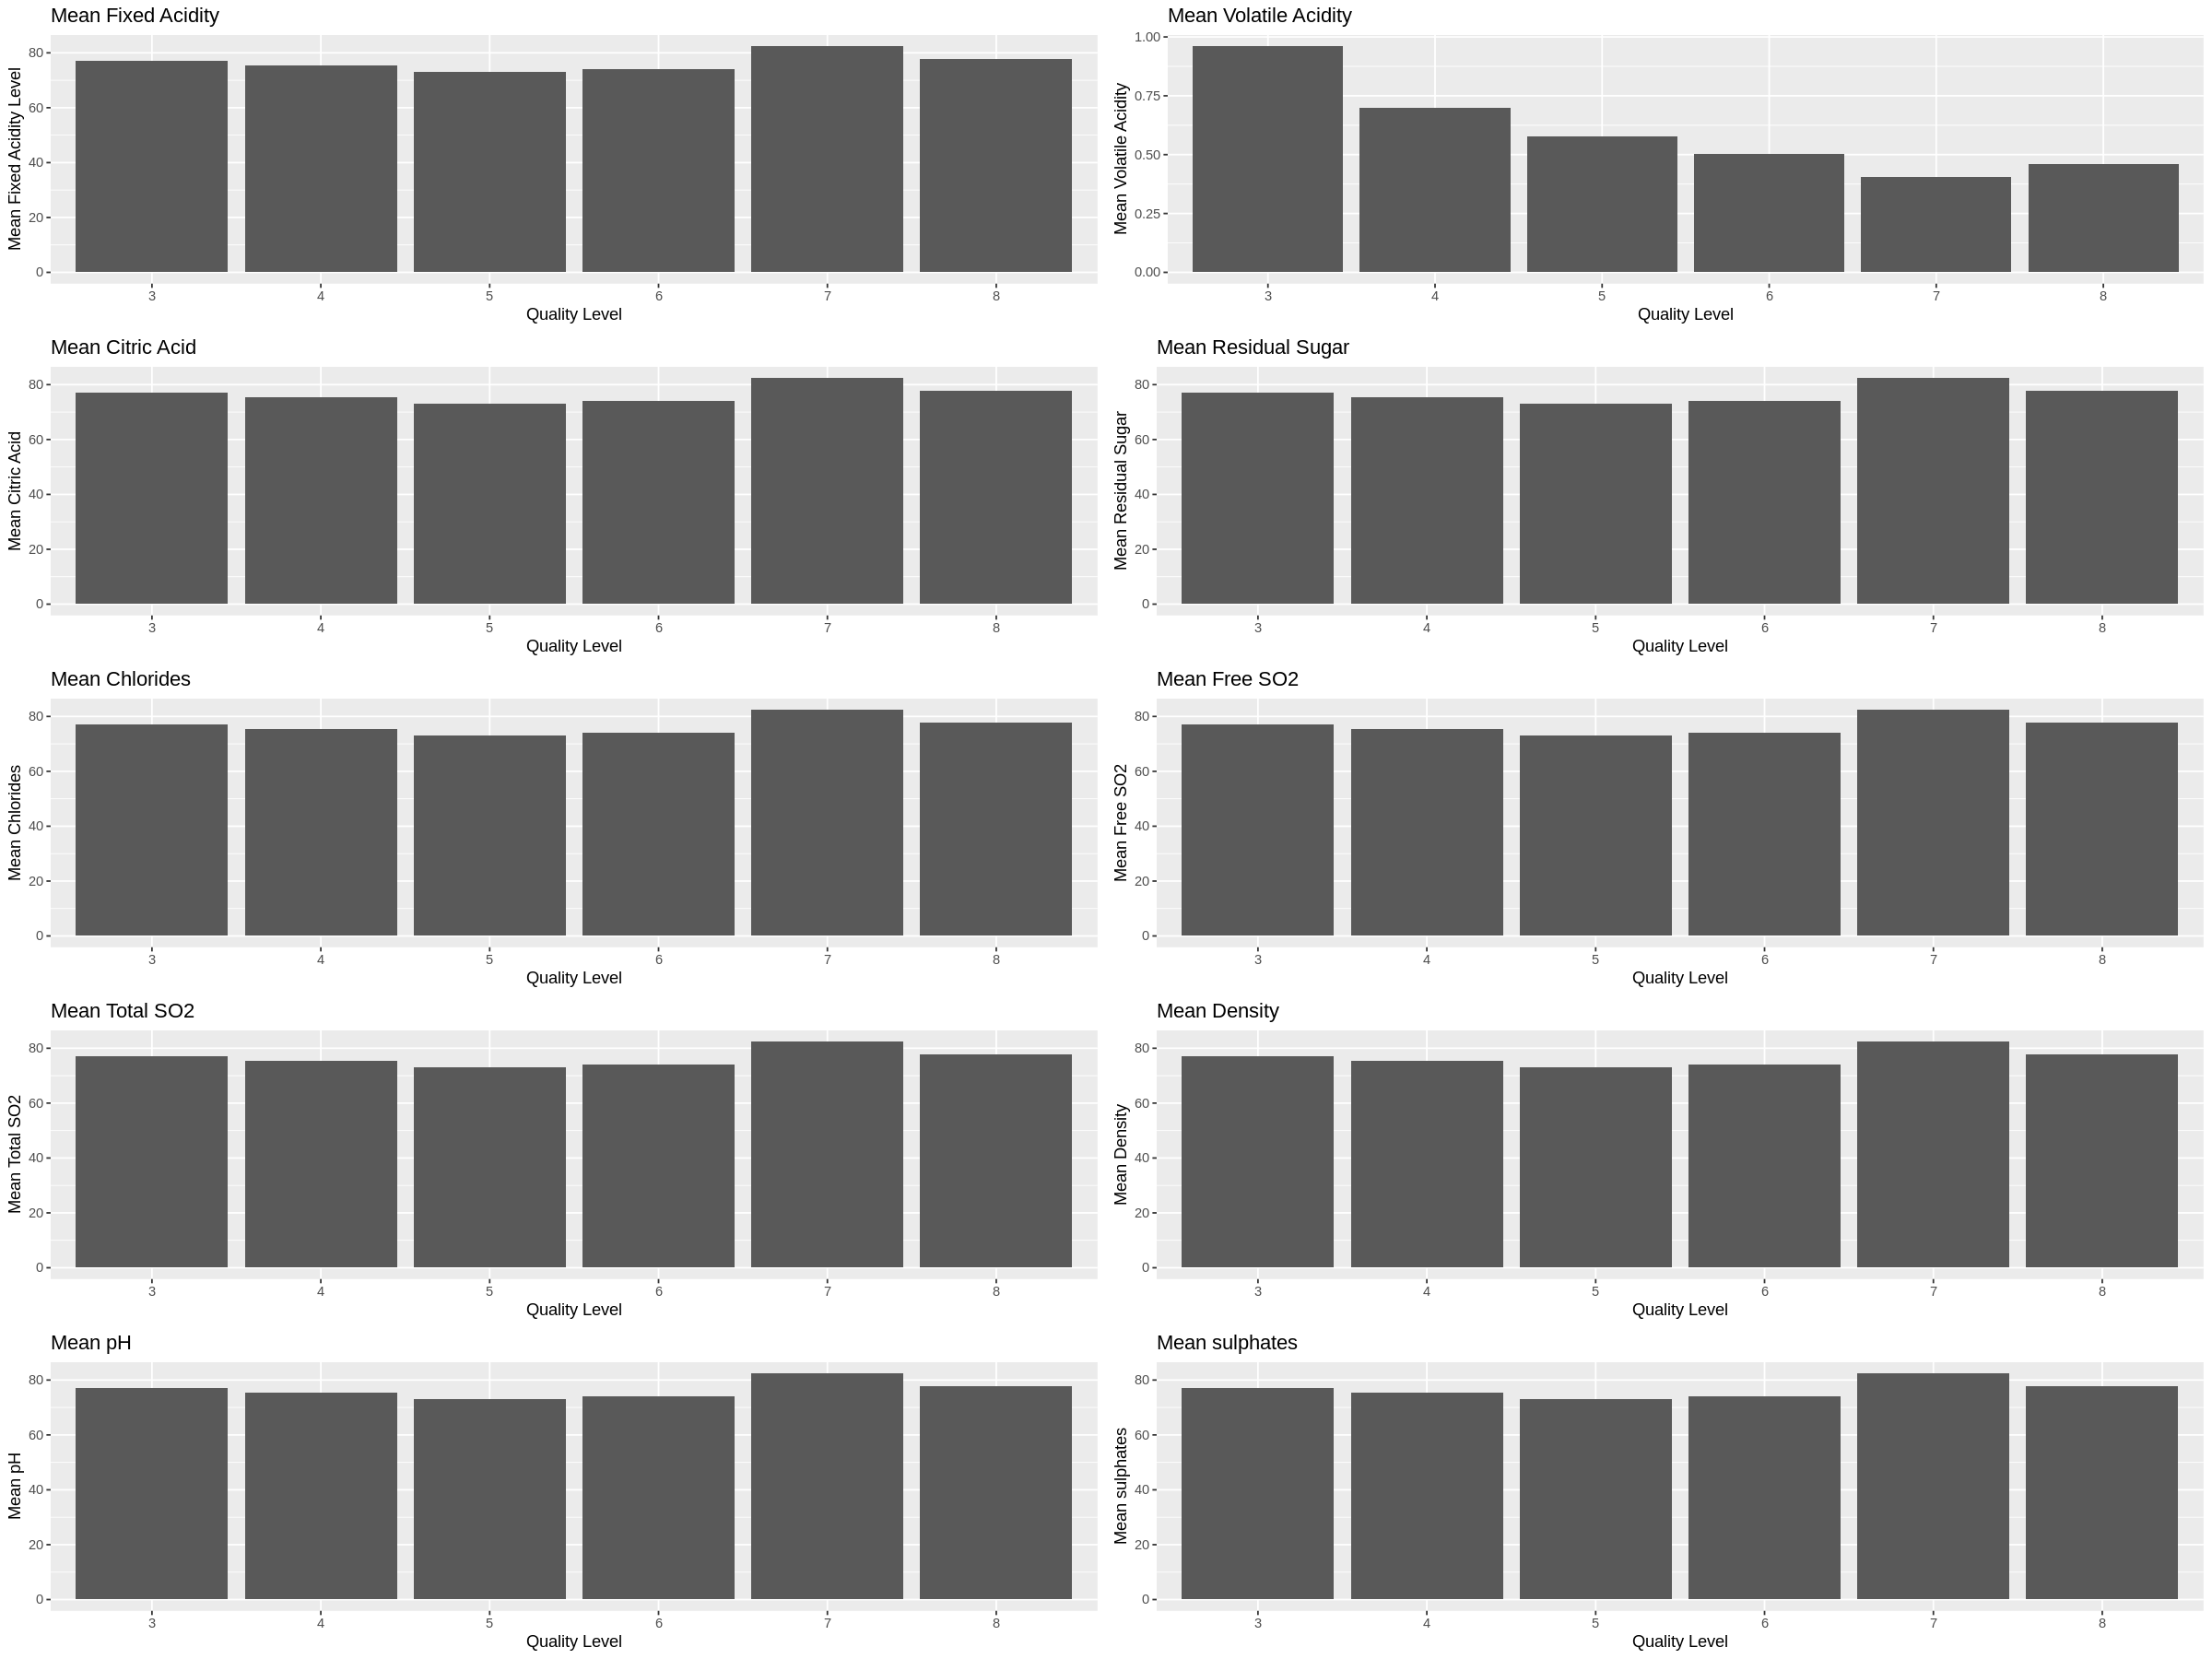

In [32]:
red_wine_fix_acidity_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_fix_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Fixed Acidity")) +
                             labs(x = "Quality Level", y = "Mean Fixed Acidity Level")

red_wine_volatile_acidity_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_v_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Volatile Acidity")) +
                             labs(x = "Quality Level", y = "Mean Volatile Acidity")

red_wine_citric_acid_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_citric_acid)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Citric Acid")) +
                             labs(x = "Quality Level", y = "Mean Citric Acid")

red_wine_residual_sugar_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_res_sugar)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Residual Sugar")) +
                             labs(x = "Quality Level", y = "Mean Residual Sugar")

red_wine_chlorides_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_chlorides)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Chlorides")) +
                             labs(x = "Quality Level", y = "Mean Chlorides")

red_wine_free_SO2_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_free_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Free SO2")) +
                             labs(x = "Quality Level", y = "Mean Free SO2")

red_wine_total_SO2_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_total_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Total SO2")) +
                             labs(x = "Quality Level", y = "Mean Total SO2")

red_wine_density_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_density)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Density")) +
                             labs(x = "Quality Level", y = "Mean Density")

red_wine_pH_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_pH)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean pH")) +
                             labs(x = "Quality Level", y = "Mean pH")

red_wine_sulphates_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_sulphates)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean sulphates")) +
                             labs(x = "Quality Level", y = "Mean sulphates")

options(repr.plot.width = 20, repr.plot.height = 15) 
library(cowplot)
plot_grid(red_wine_fix_acidity_plot, 
          red_wine_volatile_acidity_plot, 
          red_wine_citric_acid_plot, 
          red_wine_residual_sugar_plot,
          red_wine_chlorides_plot, 
          red_wine_free_SO2_plot, 
          red_wine_total_SO2_plot, 
          red_wine_density_plot,
          red_wine_pH_plot, 
          red_wine_sulphates_plot, 
          nrow = 5)

#### White Wine Means

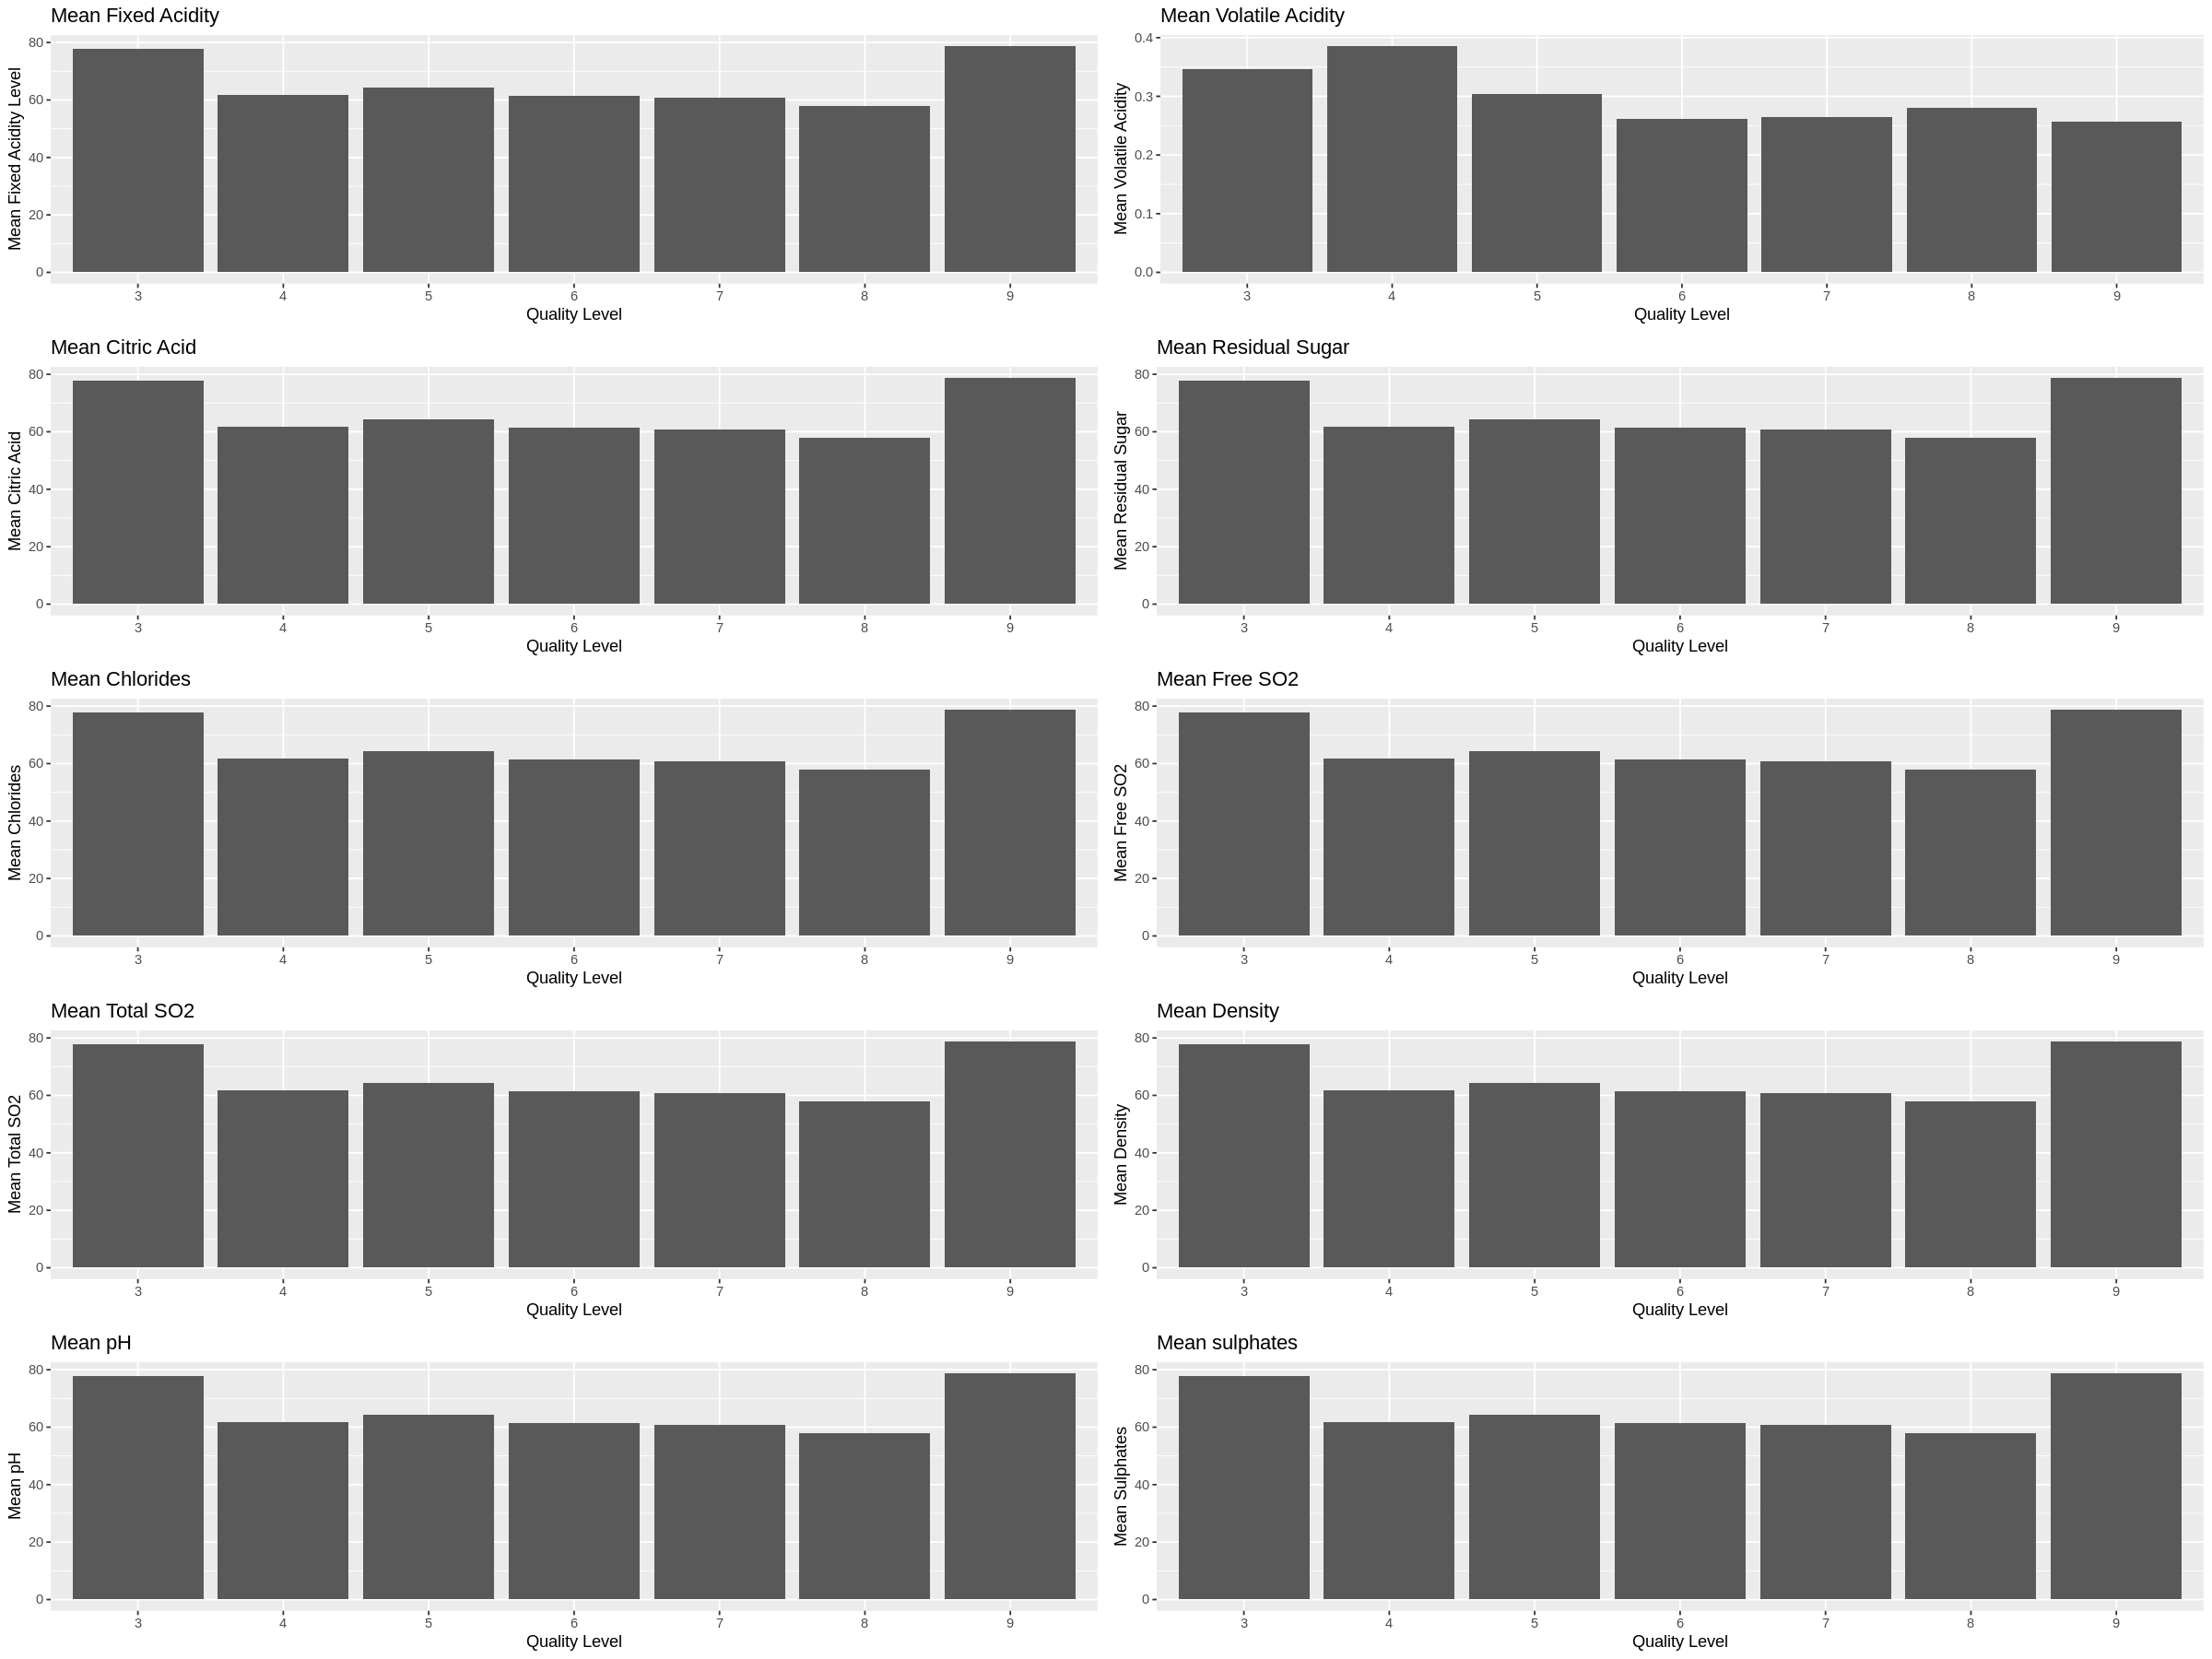

In [33]:
white_wine_fix_acidity_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_fix_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Fixed Acidity")) +
                             labs(x = "Quality Level", y = "Mean Fixed Acidity Level")

white_wine_volatile_acidity_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_v_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Volatile Acidity")) +
                             labs(x = "Quality Level", y = "Mean Volatile Acidity")

white_wine_citric_acid_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_citric_acid)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Citric Acid")) +
                             labs(x = "Quality Level", y = "Mean Citric Acid")

white_wine_residual_sugar_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_res_sugar)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Residual Sugar")) +
                             labs(x = "Quality Level", y = "Mean Residual Sugar")

white_wine_chlorides_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_chlorides)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Chlorides")) +
                             labs(x = "Quality Level", y = "Mean Chlorides")

white_wine_free_SO2_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_free_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Free SO2")) +
                             labs(x = "Quality Level", y = "Mean Free SO2")

white_wine_total_SO2_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_total_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Total SO2")) +
                             labs(x = "Quality Level", y = "Mean Total SO2")

white_wine_density_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_density)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Density")) +
                             labs(x = "Quality Level", y = "Mean Density")

white_wine_pH_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_pH)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean pH")) +
                             labs(x = "Quality Level", y = "Mean pH")

white_wine_sulphates_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_sulphates)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean sulphates")) +
                             labs(x = "Quality Level", y = "Mean Sulphates")

options(repr.plot.width = 20, repr.plot.height = 15) 
library(cowplot)
plot_grid(white_wine_fix_acidity_plot, 
          white_wine_volatile_acidity_plot, 
          white_wine_citric_acid_plot, 
          white_wine_residual_sugar_plot,
          white_wine_chlorides_plot, 
          white_wine_free_SO2_plot, 
          white_wine_total_SO2_plot, 
          white_wine_density_plot,
          white_wine_pH_plot, 
          white_wine_sulphates_plot, 
          nrow = 5)

## Expected Outcomes
- We expect to find that each quality of wine have a distinct combonation of all the factors and be able to use this classification model to predicate any future wine inputs' quality

## Significance
These findings could help business strategists to improve the quality of their wine by adjusting for example the pH value or fermentating time to change the chemical levels. It also save the work to find a wine tester and may be more non-subjective.